In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/premiums_rest.xlsx')
df.head()


,Unnamed: 0,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [3]:
df.shape

(29904, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             29904 non-null  int64 
 1   Age                    29904 non-null  int64 
 2   Gender                 29904 non-null  object
 3   Region                 29904 non-null  object
 4   Marital_status         29904 non-null  object
 5   Number Of Dependants   29904 non-null  int64 
 6   BMI_Category           29904 non-null  object
 7   Smoking_Status         29895 non-null  object
 8   Employment_Status      29903 non-null  object
 9   Income_Level           29895 non-null  object
 10  Income_Lakhs           29904 non-null  int64 
 11  Medical History        29904 non-null  object
 12  Insurance_Plan         29904 non-null  object
 13  Annual_Premium_Amount  29904 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


### Converting columns into consistent naming

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [6]:
df.sample()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
2135,3532,46,Male,Northwest,Married,2,Overweight,No Smoking,Self-Employed,10L - 25L,14,High blood pressure,Gold,28667


In [7]:
df.isnull().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### Handle NA values

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.000000
mean,25027.094091,43.396105,2.379910,23.364184,20892.303821
std,14432.632929,13.412657,1.431201,24.740339,6936.813440
min,0.000000,26.000000,-3.000000,1.000000,3625.000000
25%,12599.250000,34.000000,1.000000,7.000000,15697.250000
50%,25067.500000,42.000000,3.000000,17.000000,20489.000000
75%,37563.750000,52.000000,3.000000,32.000000,26360.000000
max,49999.000000,356.000000,5.000000,930.000000,43471.000000


#### max age is 356 and min number_of_dependents are -3 , which is practically impossible.

In [13]:
df[df.number_of_dependants<0]

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
1805,2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
2273,3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
3513,5846,56,Male,Southwest,Married,-3,Normal,Occasional,Salaried,10L - 25L,16,Thyroid,Bronze,11979
3904,6498,26,Male,Southeast,Married,-1,Obesity,Occasional,Freelancer,25L - 40L,27,No Disease,Silver,18269
4900,8189,37,Male,Northwest,Married,-1,Overweight,Regular,Self-Employed,<10L,8,Diabetes,Bronze,13664
5917,9933,42,Female,Southeast,Unmarried,-3,Overweight,Regular,Self-Employed,<10L,8,Diabetes & Heart disease,Bronze,17779
7095,11962,50,Female,Northwest,Married,-3,Normal,Occasional,Salaried,<10L,4,Diabetes & High blood pressure,Silver,21957
7222,12188,47,Male,Northwest,Unmarried,-3,Overweight,Occasional,Self-Employed,10L - 25L,19,No Disease,Gold,27457
7551,12732,39,Male,Southwest,Unmarried,-1,Overweight,Occasional,Self-Employed,25L - 40L,40,High blood pressure,Silver,18406
9047,15219,47,Male,Northwest,Married,-1,Overweight,Occasional,Self-Employed,25L - 40L,27,High blood pressure,Gold,29812


In [14]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-1, -3], dtype=int64)

#### converting negative values into positive values

In [15]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df.number_of_dependants.describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [16]:
df.age.describe()

count    29886.000000
mean        43.396105
std         13.412657
min         26.000000
25%         34.000000
50%         42.000000
75%         52.000000
max        356.000000
Name: age, dtype: float64

### Vizualization

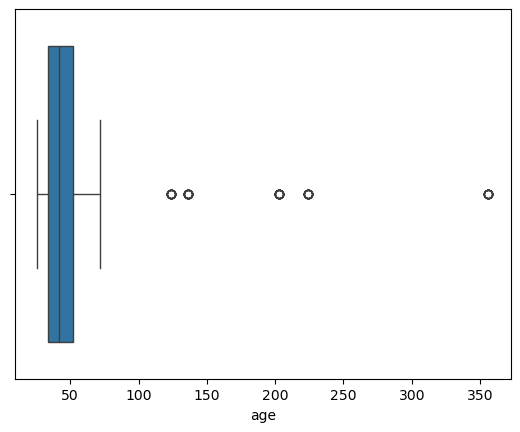

In [17]:
sns.boxplot(x=df['age'])
plt.show()

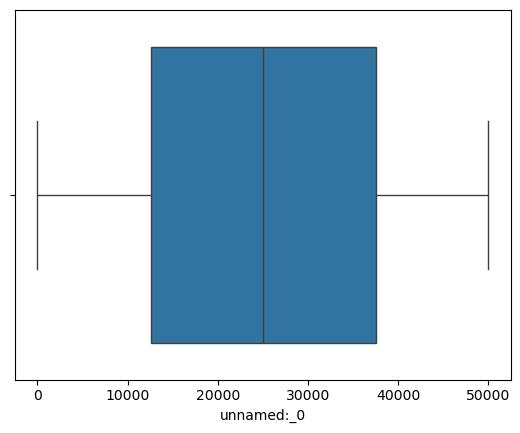

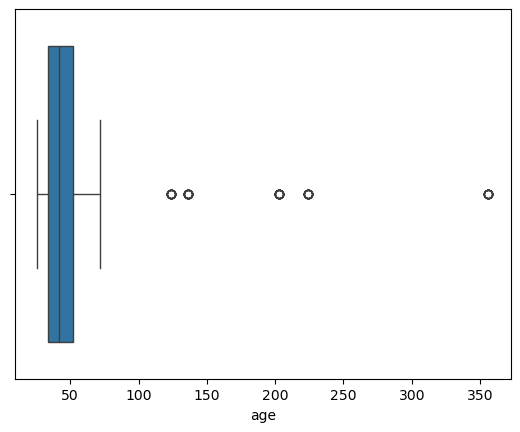

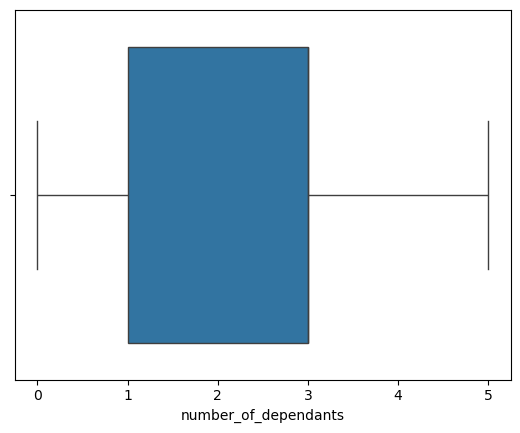

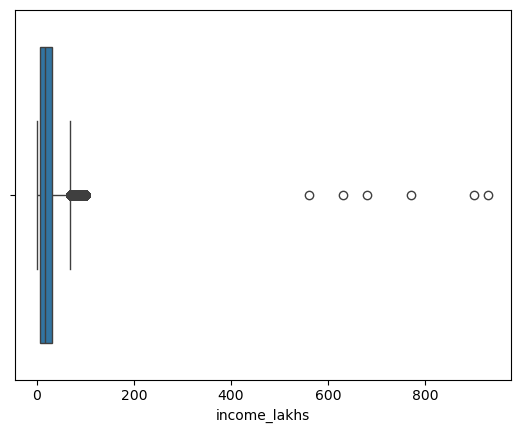

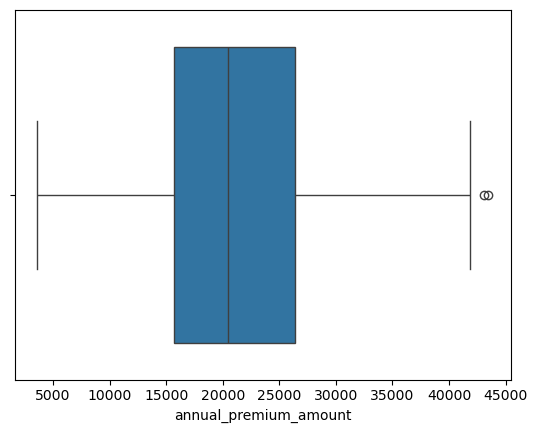

In [18]:
numeric_columns = df.select_dtypes(include=np.number).columns

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()
    

In [19]:
df[df.age>100].shape

(58, 14)

In [20]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [21]:
df1 = df[df.age<=100].copy()
df1.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.000000
mean,25028.882091,43.095380,2.387790,23.371530,20901.900563
std,14431.843528,11.041991,1.420641,24.751262,6928.457636
min,0.000000,26.000000,0.000000,1.000000,6538.000000
25%,12599.750000,34.000000,1.000000,7.000000,15706.000000
50%,25068.500000,42.000000,3.000000,17.000000,20496.000000
75%,37564.500000,52.000000,3.000000,32.000000,26361.000000
max,49999.000000,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

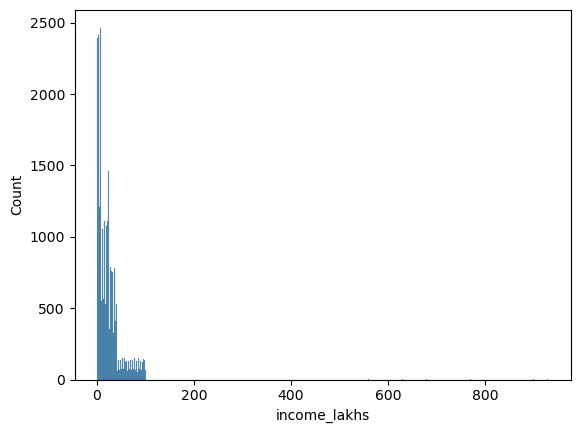

In [22]:
sns.histplot(df1.income_lakhs)

In [23]:
df.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    32.0
Name: income_lakhs, dtype: float64

In [24]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [25]:
get_iqr_bounds(df1.income_lakhs)

(-30.5, 69.5)

In [26]:
df1.income_lakhs.quantile(0.999)

100.0

In [27]:
quantile_threshold = df1.income_lakhs.quantile(0.999)

In [28]:
df1[df1.income_lakhs>quantile_threshold].shape

(6, 14)

In [29]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,25030.357152,43.094896,2.387734,23.226343,20900.689223
std,14431.397026,11.042430,1.420644,22.455408,6928.192115
min,0.000000,26.000000,0.000000,1.000000,6538.000000
25%,12605.250000,34.000000,1.000000,7.000000,15705.250000
50%,25070.000000,42.000000,3.000000,17.000000,20495.500000
75%,37565.500000,52.000000,3.000000,32.000000,26360.000000
max,49999.000000,72.000000,5.000000,100.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

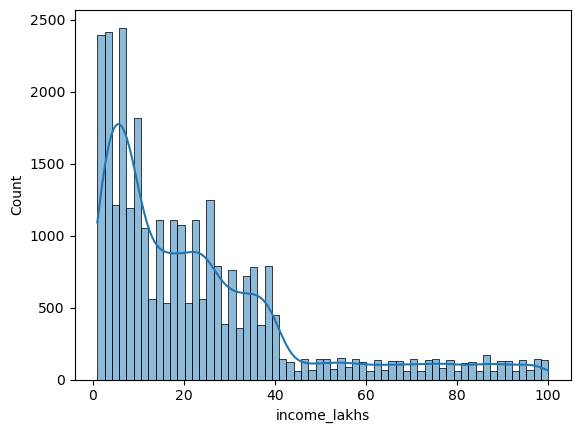

In [30]:
sns.histplot(df2['income_lakhs'], kde=True)

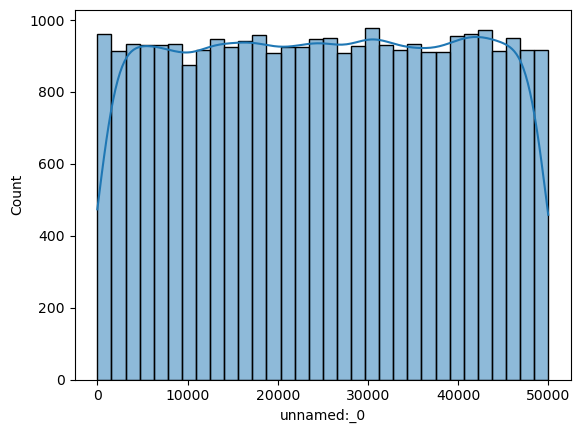

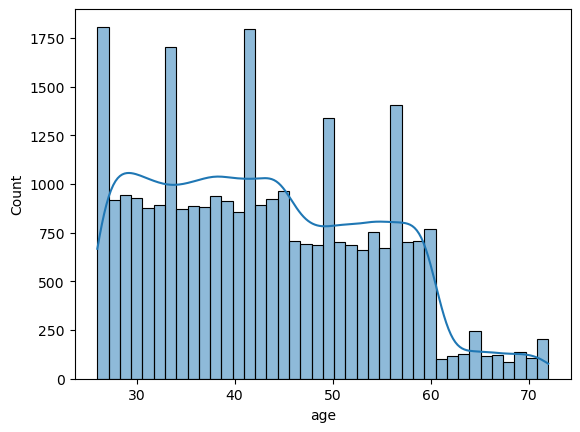

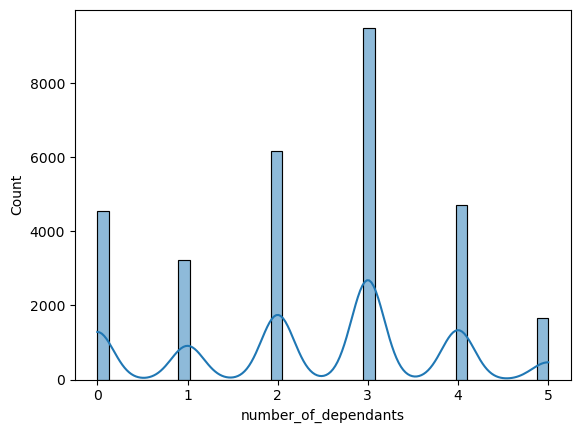

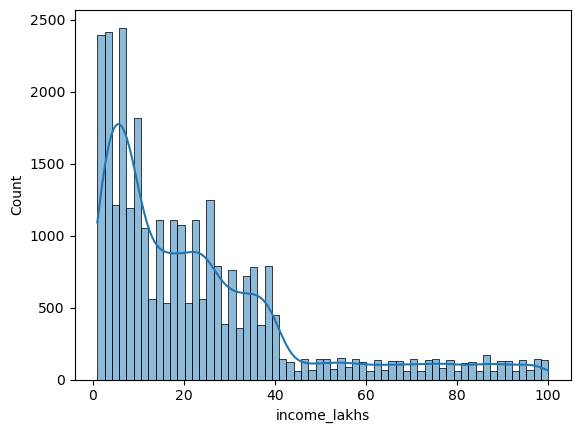

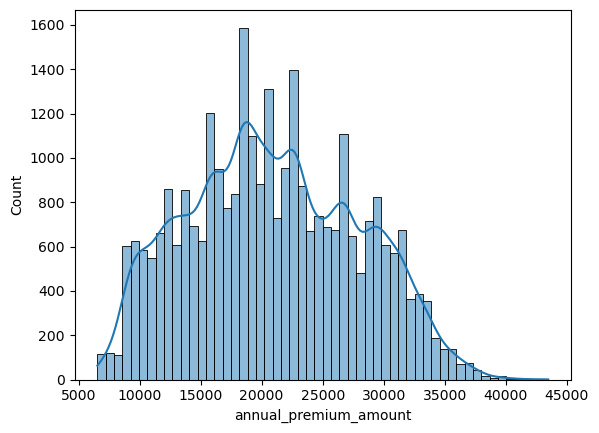

In [31]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

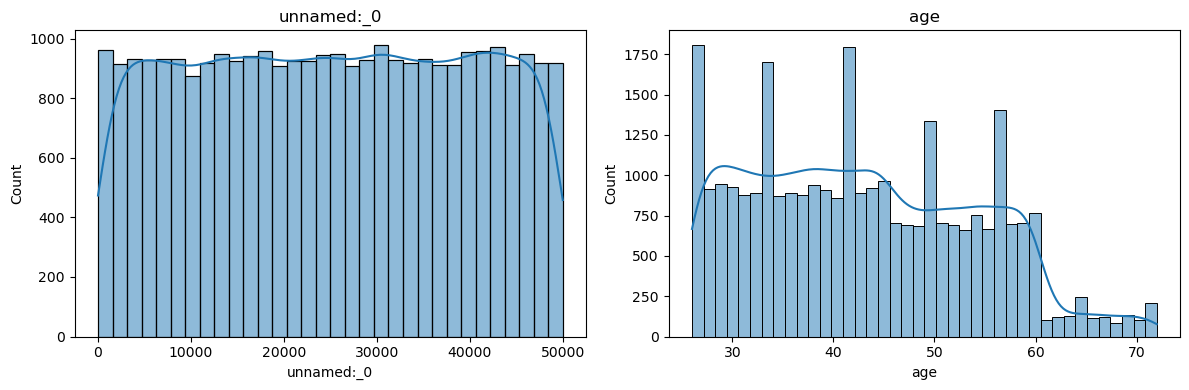

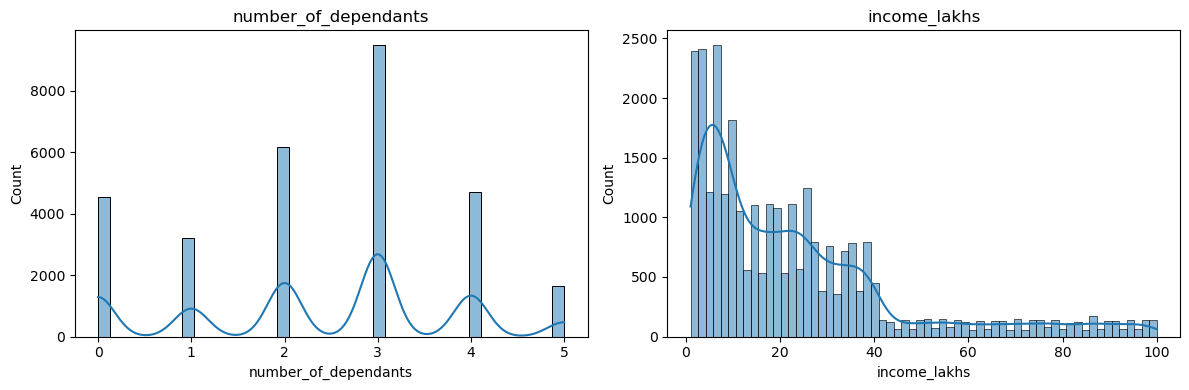

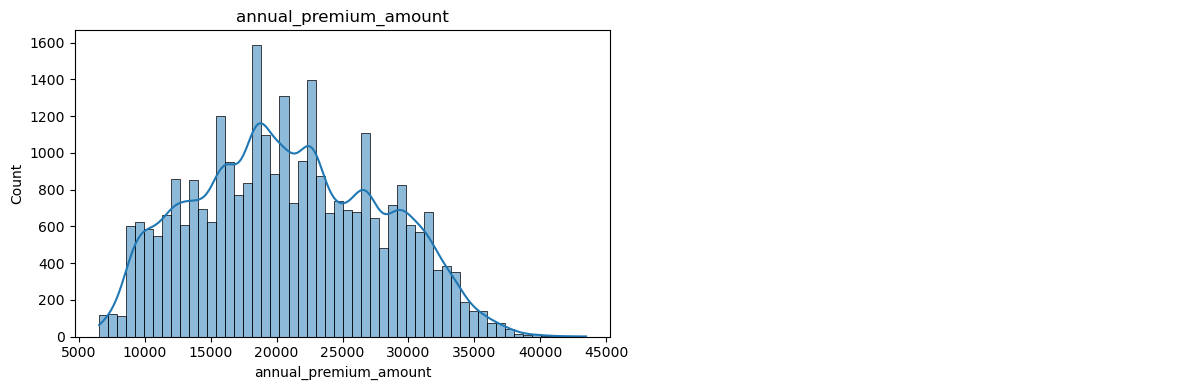

In [32]:
for i in range(0, len(numeric_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # First plot
    sns.histplot(df2[numeric_columns[i]], kde=True, ax=axes[0])
    axes[0].set_title(numeric_columns[i])
    
    # Second plot (check if exists)
    if i + 1 < len(numeric_columns):
        sns.histplot(df2[numeric_columns[i+1]], kde=True, ax=axes[1])
        axes[1].set_title(numeric_columns[i+1])
    else:
        axes[1].axis("off")  # hide empty plot
    
    plt.tight_layout()
    plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

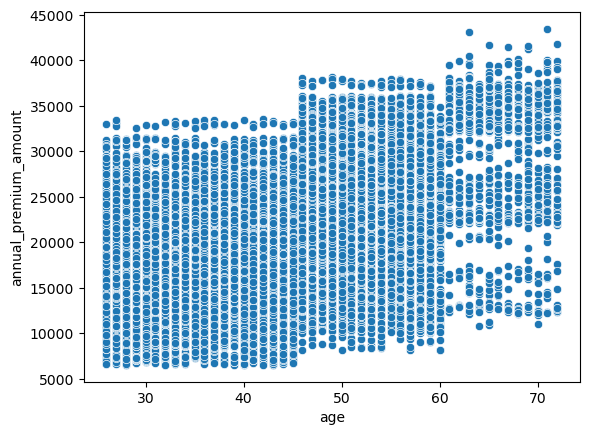

In [33]:
sns.scatterplot(df2, x='age', y='annual_premium_amount')

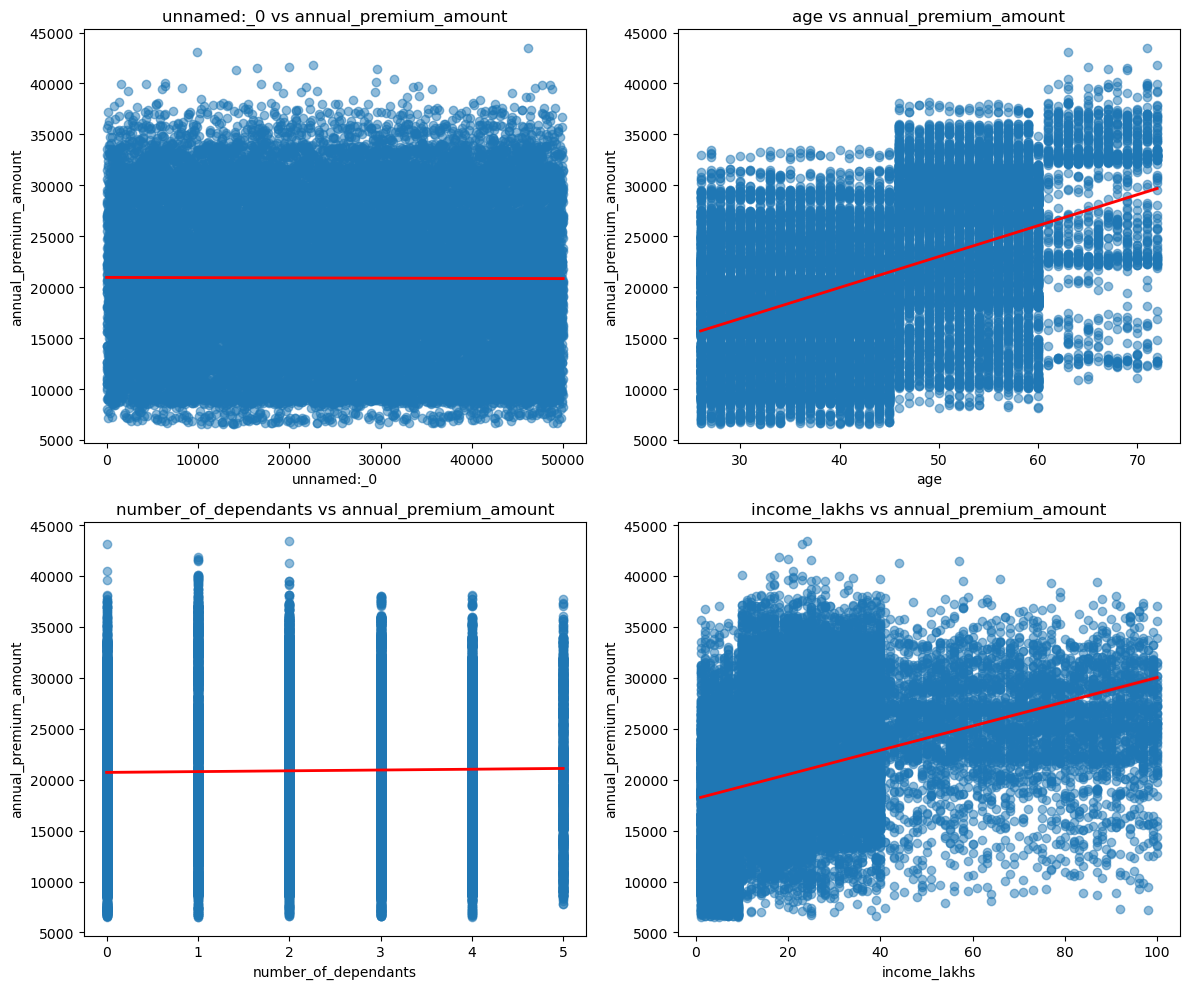

In [34]:

import math

target = 'annual_premium_amount'

# Remove target if it's inside numeric_columns
features = [col for col in numeric_columns if col != target]

n_cols = 2
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.regplot(
        data=df2,
        x=col,
        y=target,
        ax=axes[i],
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    axes[i].set_title(f"{col} vs {target}")

# Hide extra empty plots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [35]:
categorical_columns = df2.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [36]:
for col in categorical_columns:
    print(col , ':', df2[col].unique())
    print('-'*60)

gender : ['Male' 'Female']
------------------------------------------------------------
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
------------------------------------------------------------
marital_status : ['Unmarried' 'Married']
------------------------------------------------------------
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
------------------------------------------------------------
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
------------------------------------------------------------
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
------------------------------------------------------------
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
------------------------------------------------------------
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'D

In [37]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
}, inplace=True)

C:\Users\bansa\AppData\Local\Temp\ipykernel_21792\4234562676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [38]:
df2.smoking_status.unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [39]:
for col in categorical_columns:
    print(df2[col].value_counts(normalize=True))
    print('-'*70)

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64
----------------------------------------------------------------------
region
Southeast    0.352693
Southwest    0.301992
Northwest    0.200691
Northeast    0.144625
Name: proportion, dtype: float64
----------------------------------------------------------------------
marital_status
Married      0.746664
Unmarried    0.253336
Name: proportion, dtype: float64
----------------------------------------------------------------------
bmi_category
Normal         0.398028
Overweight     0.295051
Obesity        0.196835
Underweight    0.110087
Name: proportion, dtype: float64
----------------------------------------------------------------------
smoking_status
No Smoking    0.452116
Regular       0.374656
Occasional    0.173228
Name: proportion, dtype: float64
----------------------------------------------------------------------
employment_status
Salaried         0.466132
Self-Employed    0.354269
Freelancer       0

<Axes: xlabel='gender', ylabel='annual_premium_amount'>

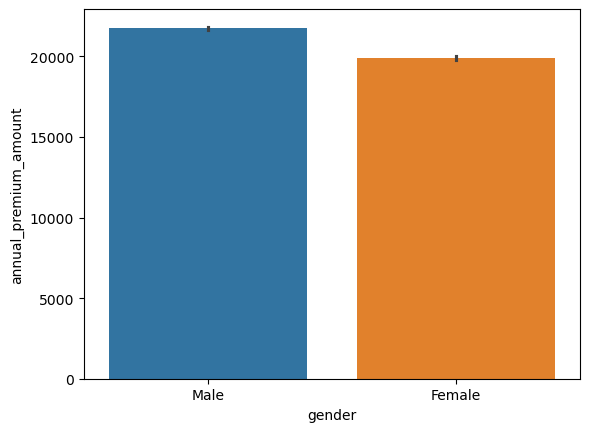

In [40]:
sns.barplot(df2,x='gender', y='annual_premium_amount',hue='gender')

In [41]:
pct_count = df2.gender.value_counts(normalize=True)


<Axes: xlabel='gender'>

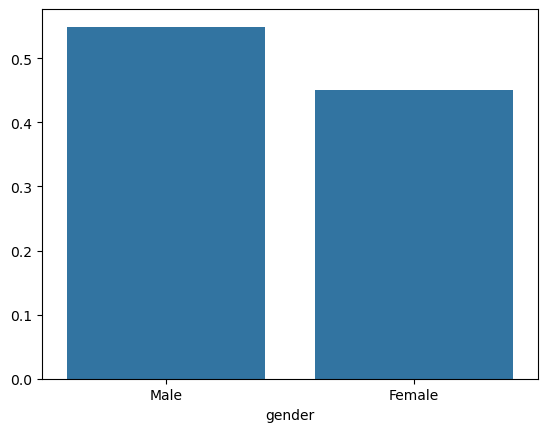

In [42]:
sns.barplot(x=pct_count.index, y=pct_count.values
            )

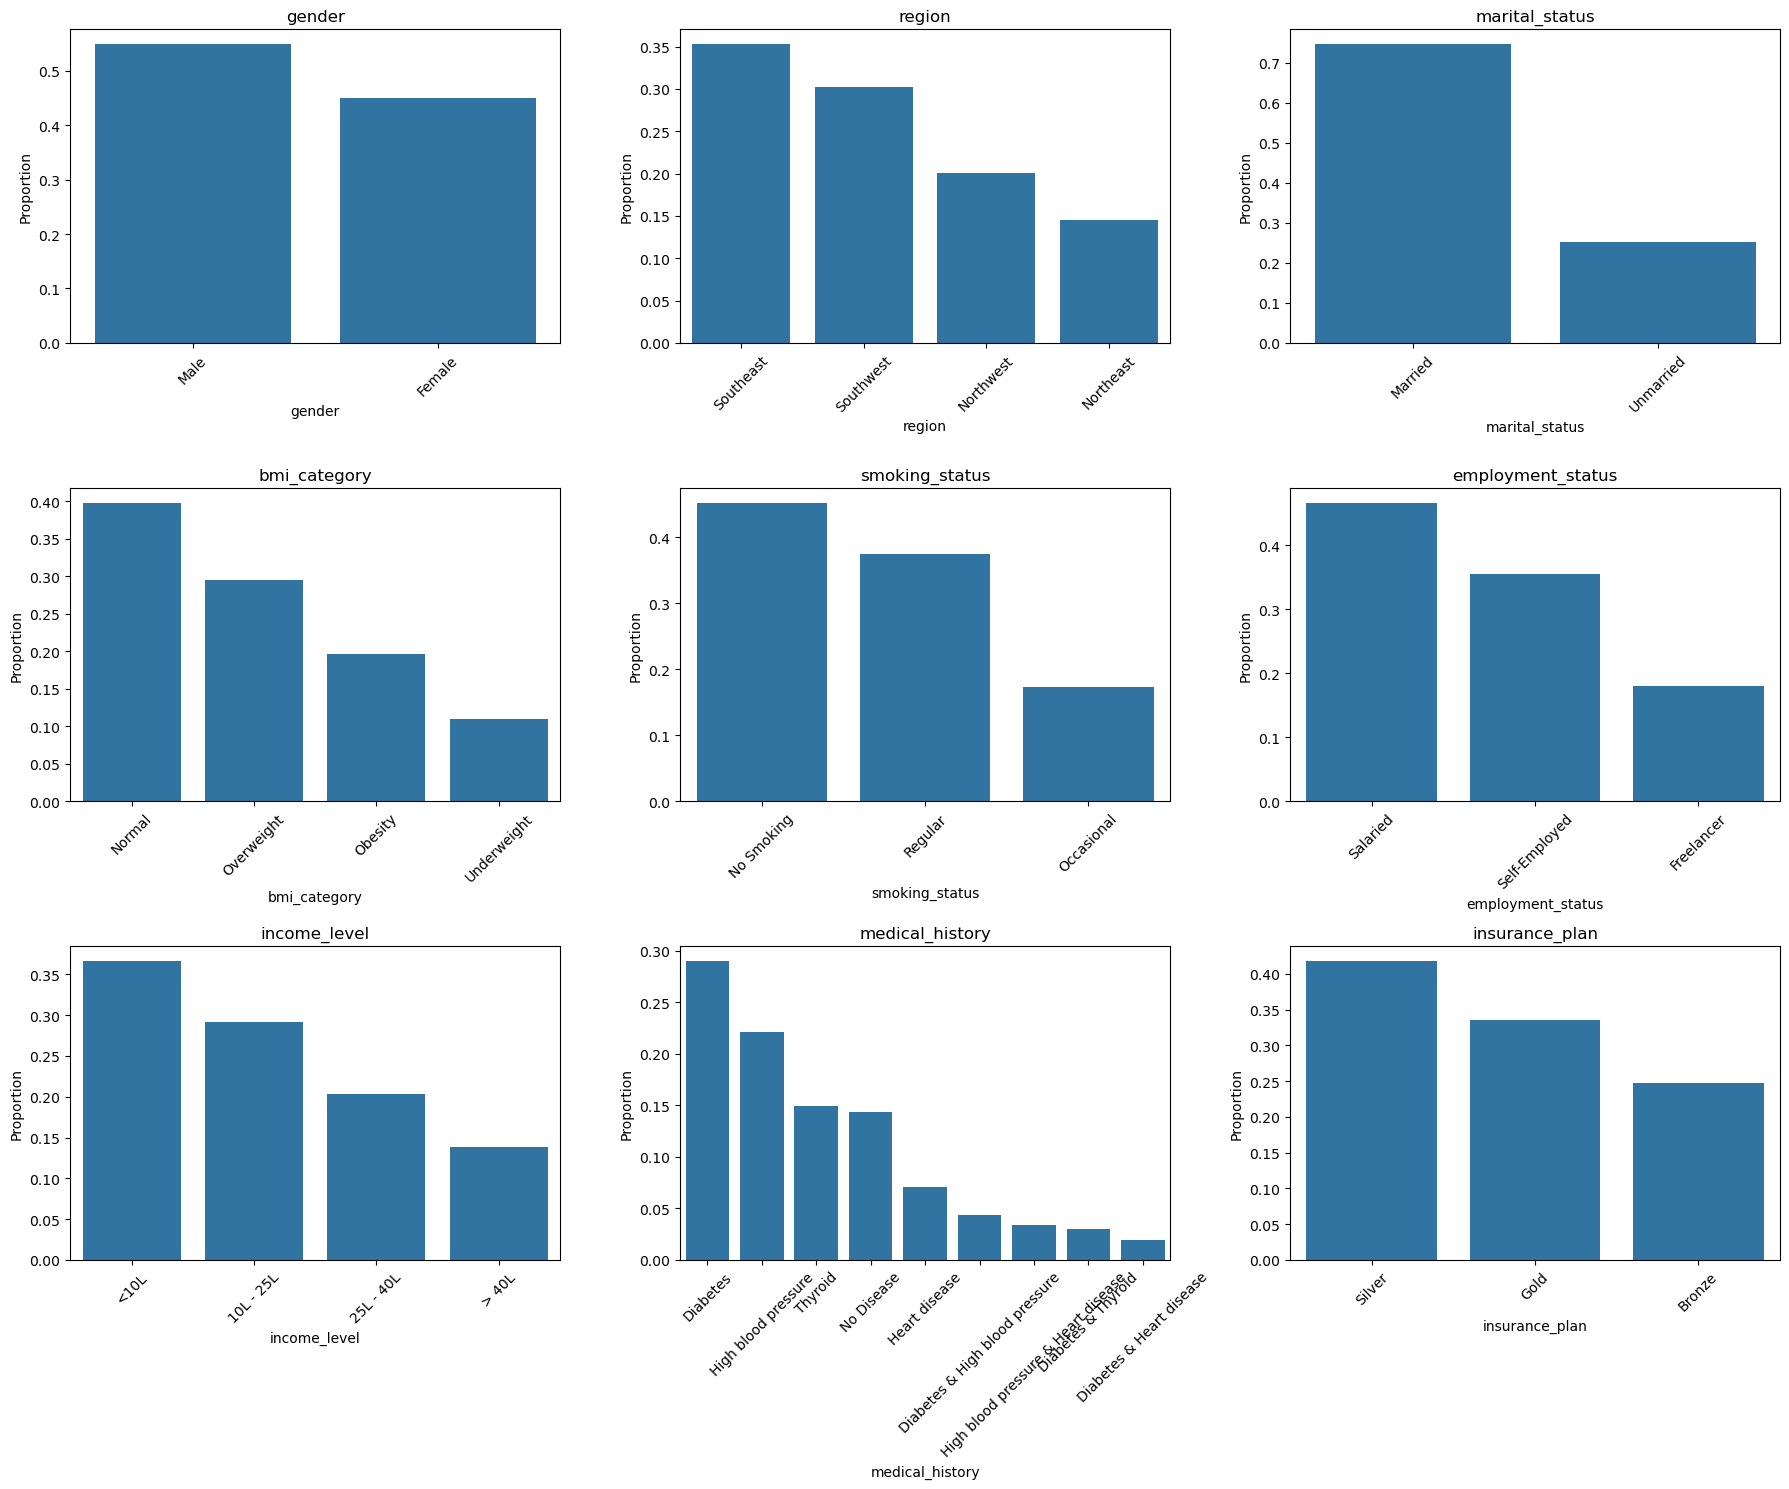

In [43]:
n_cols = 3   # 👈 3 charts per row
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    
    freq = df2[col].value_counts(normalize=True)
    
    sns.barplot(
        x=freq.index,
        y=freq.values,
        ax=axes[i]
    )
    
    axes[i].set_title(col)
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty plots if any
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [44]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab


insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


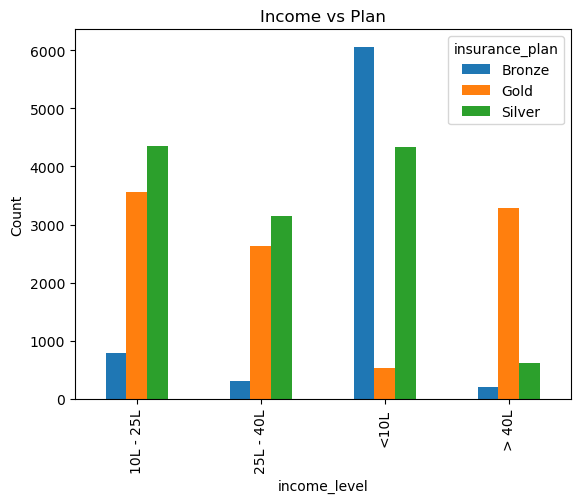

In [45]:
crosstab.plot(kind='bar')
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [46]:
df2.sample()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
12258,20564,52,Female,Southwest,Married,3,Obesity,Occasional,Self-Employed,<10L,6,High blood pressure,Gold,31744


In [47]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

#### As per domain understanding , we are assigning risk score to diseases

In [48]:
risk_score = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

df2[['disease1','disease2']] = (
    df2.medical_history.str.split('&', expand=True)
    .apply(lambda x: x.str.lower().str.strip())
)

df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)

df2['total_risk_score'] = 0
for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_score)

C:\Users\bansa\AppData\Local\Temp\ipykernel_21792\2481471933.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\bansa\AppData\Local\Temp\ipykernel_21792\2481471933.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [49]:
print(df2[['disease1', 'disease2', 'total_risk_score']].sample(10))

                  disease1             disease2  total_risk_score
6699               thyroid                 none                 5
24543             diabetes                 none                 6
25462             diabetes                 none                 6
20395  high blood pressure                 none                 6
8749              diabetes              thyroid                11
8025              diabetes                 none                 6
13383              thyroid                 none                 5
13169             diabetes  high blood pressure                12
17982           no disease                 none                 0
1335   high blood pressure                 none                 6


In [50]:
max_score = df2.total_risk_score.max()
min_score = df2.total_risk_score.min()

df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.sample(5)

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
25708,42987,52,Male,Southwest,Married,3,Obesity,Regular,Self-Employed,<10L,5,High blood pressure,Silver,25288,high blood pressure,none,6,0.428571
16962,28453,28,Female,Northwest,Married,3,Normal,No Smoking,Freelancer,<10L,9,High blood pressure,Bronze,9469,high blood pressure,none,6,0.428571
13672,22959,54,Female,Northwest,Married,3,Overweight,Regular,Salaried,10L - 25L,19,Diabetes,Gold,31516,diabetes,none,6,0.428571
10223,17154,44,Male,Northwest,Unmarried,0,Normal,Regular,Self-Employed,> 40L,47,High blood pressure,Gold,25215,high blood pressure,none,6,0.428571
11553,19365,66,Female,Northwest,Married,2,Overweight,No Smoking,Self-Employed,<10L,6,High blood pressure,Silver,24742,high blood pressure,none,6,0.428571


In [51]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [52]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2.insurance_plan.unique()

array([1, 2, 3], dtype=int64)

In [53]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [54]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})
df2.sample(3)

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
15466,25914,44,Male,Southwest,Married,2,Underweight,Regular,Self-Employed,1,5,Heart disease,2,23568,heart disease,none,8,0.571429
5172,8639,33,Male,Northeast,Unmarried,2,Normal,Regular,Freelancer,1,4,No Disease,2,16187,no disease,none,0,0.000000
13701,23012,44,Male,Southeast,Married,3,Normal,Regular,Salaried,2,23,High blood pressure,2,18064,high blood pressure,none,6,0.428571


In [55]:
df2.columns

Index(['unnamed:_0', 'age', 'gender', 'region', 'marital_status',
       'number_of_dependants', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'income_lakhs', 'medical_history',
       'insurance_plan', 'annual_premium_amount', 'disease1', 'disease2',
       'total_risk_score', 'normalized_risk_score'],
      dtype='object')

In [56]:
nominal_cols = ['gender', 'region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.sample(5)

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
6741,11378,42,3,4,75,High blood pressure,3,22230,high blood pressure,none,...,1,0,0,0,0,1,0,0,1,0
13911,23358,37,1,2,12,Diabetes,2,18342,diabetes,none,...,1,0,1,0,1,0,1,0,0,1
13974,23453,39,1,4,55,High blood pressure,3,26135,high blood pressure,none,...,0,1,1,1,0,0,0,0,1,0
18209,30495,48,3,1,4,No Disease,2,19860,no disease,none,...,0,1,0,0,0,0,0,1,0,1
20109,33626,44,2,1,2,No Disease,1,7426,no disease,none,...,0,0,0,0,0,0,0,0,1,0


In [57]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'], axis=1)
df4.sample(5)

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
7057,11903,39,3,3,35,2,18093,0.428571,0,0,0,1,0,0,1,0,1,0,1,0
19214,32134,40,0,1,5,1,15939,0.571429,0,0,0,1,1,0,0,0,0,1,1,0
15440,25874,41,2,4,65,3,27329,0.428571,1,1,0,0,0,0,1,0,0,1,1,0
19381,32425,55,3,2,19,3,28160,0.428571,1,0,1,0,0,0,1,0,0,0,1,0
24895,41641,59,3,4,100,3,35593,1.000000,1,0,0,1,0,0,1,0,0,1,0,1


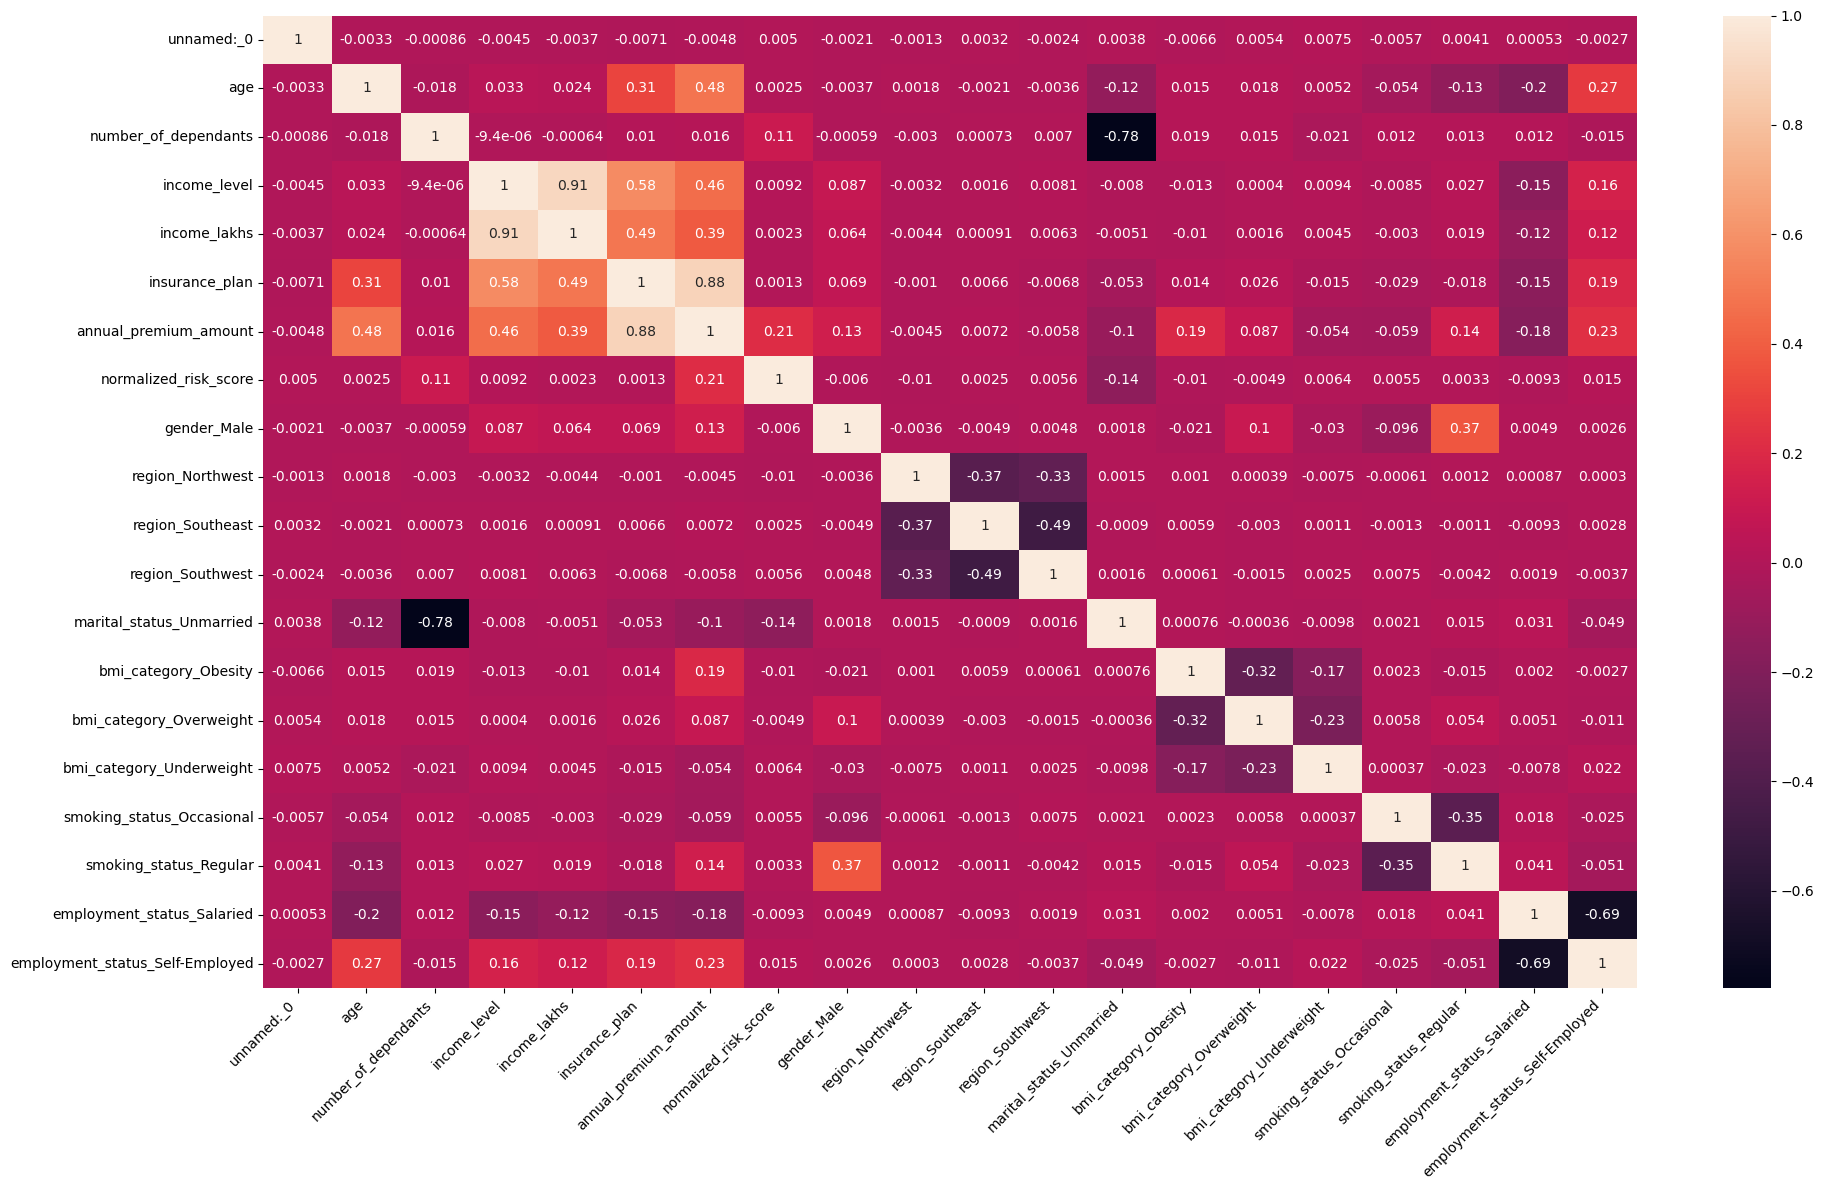

In [58]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Variance Inflation factor

In [59]:
X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_lakhs','insurance_plan']

scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.sample(4)


,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
26312,43940,0.478261,0.8,1,0.000000,0.5,0.428571,1,0,1,0,0,0,1,0,0,1,1,0
9014,15173,0.108696,0.0,1,0.030303,0.0,0.571429,0,0,0,1,1,0,0,0,0,0,1,0
14405,24164,0.065217,0.0,2,0.191919,0.5,0.428571,1,1,0,0,1,0,1,0,0,1,1,0
6575,11078,0.413043,0.0,4,0.747475,1.0,0.428571,1,1,0,0,1,1,0,0,0,0,1,0


In [60]:
X.describe()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,25030.357152,0.371628,0.477547,2.113674,0.224509,0.544112,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,14431.397026,0.240053,0.284129,1.053332,0.226822,0.379009,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12605.250000,0.173913,0.200000,1.000000,0.060606,0.500000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25070.000000,0.347826,0.600000,2.000000,0.161616,0.500000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37565.500000,0.565217,0.600000,3.000000,0.313131,1.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,49999.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [62]:
calculate_vif(X)

,Column,VIF
0,unnamed:_0,3.749678
1,age,3.898383
2,number_of_dependants,7.054269
3,income_level,28.343673
4,income_lakhs,10.263794
5,insurance_plan,5.283789
6,normalized_risk_score,3.917576
7,gender_Male,2.613442
8,region_Northwest,2.183460
9,region_Southeast,3.083760


In [63]:
calculate_vif(X.drop('income_level', axis=1))

,Column,VIF
0,unnamed:_0,3.707947
1,age,3.898275
2,number_of_dependants,6.573384
3,income_lakhs,2.679612
4,insurance_plan,4.576402
5,normalized_risk_score,3.845003
6,gender_Male,2.593274
7,region_Northwest,2.142869
8,region_Southeast,3.015344
9,region_Southwest,2.736554


In [64]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,unnamed:_0,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0,0.000000,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,1,0.065217,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,2,0.500000,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,3,0.086957,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,5,0.652174,0.6,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


## Model Training

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)
print('X_train:', X_train.shape)
print('X_test:',X_test.shape)
print('y_train:', y_train.shape)
print('y_test:',y_test.shape)

X_train: (20875, 18)
X_test: (8947, 18)
y_train: (20875,)
y_test: (8947,)


In [66]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score_lr = model_lr.score(X_train, y_train)
test_score_lr = model_lr.score(X_test,y_test)
train_score_lr, test_score_lr

(0.9534184332289006, 0.9538411285760261)

In [67]:
from sklearn.metrics import mean_squared_error
y_pred  = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> \nMSE: ", mse_lr ,"\nRMSE: ", rmse_lr)

Linear Regression ==> 
MSE:  2184020.211688537 
RMSE:  1477.8430944077038


In [68]:
model_lr.coef_

array([ 6.88073831e-04,  7.01633082e+03, -1.31205589e+03, -7.08042262e+02,
        1.48361753e+04,  6.05365807e+03,  3.76451740e+01, -5.53382927e+01,
       -1.98130276e+01, -2.22809244e+01, -7.00512523e+02,  3.92707815e+03,
        1.97924996e+03,  6.12987523e+02,  8.37571296e+02,  2.80060375e+03,
       -4.53762326e+01,  2.43135608e+02])

## Feature Importance

In [69]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df

,Coefficients
unnamed:_0,0.000688
age,7016.330816
number_of_dependants,-1312.055895
income_lakhs,-708.042262
insurance_plan,14836.175303
normalized_risk_score,6053.658068
gender_Male,37.645174
region_Northwest,-55.338293
region_Southeast,-19.813028
region_Southwest,-22.280924


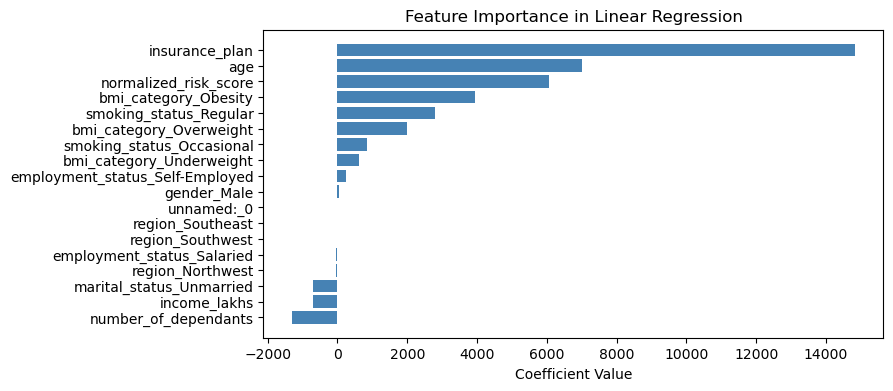

In [70]:
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [71]:
from sklearn.linear_model import Ridge, Lasso

model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score_rg = model_rg.score(X_train, y_train)
test_score_rg = model_rg.score(X_test,y_test)
train_score_rg, test_score_rg

(0.9534182674866951, 0.9538420204822269)

In [72]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score_xgb = model_xgb.score(X_train, y_train)
test_score_xgb = model_xgb.score(X_test,y_test)
train_score_xgb, test_score_xgb

(0.998746395111084, 0.9979413747787476)

In [73]:
y_pred_xgb  = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost Regression ==> \nMSE: ", mse_xgb ,"\nRMSE: ", rmse_xgb)

XGBoost Regression ==> 
MSE:  97405.50036853437 
RMSE:  312.0985427209399


In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
param_grid_xgb = {
    'n_estimators': [20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth': [3,4,5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid_xgb, n_iter=20, cv=3, scoring='r2', random_state=10)
random_search.fit(X_train, y_train)
random_search.best_score_


0.9980637431144714

In [75]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2}

In [76]:
best_model = random_search.best_estimator_

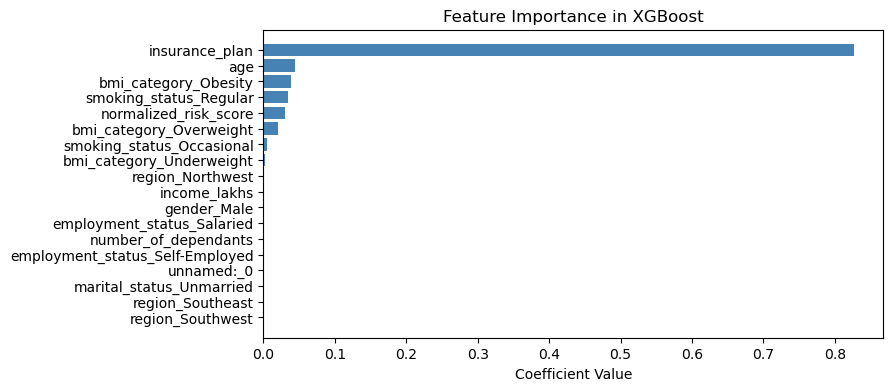

In [77]:
feature_importances = best_model.feature_importances_
coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

## Error Analysis

In [78]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
    
})
results_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26544.015625,-350.984375,-1.305017
14750,22734,22987.812500,253.812500,1.116445
19932,21198,21591.164062,393.164062,1.854722
29643,9100,9080.662109,-19.337891,-0.212504
17076,26434,26544.015625,110.015625,0.416190


<Axes: xlabel='diff_pct', ylabel='Count'>

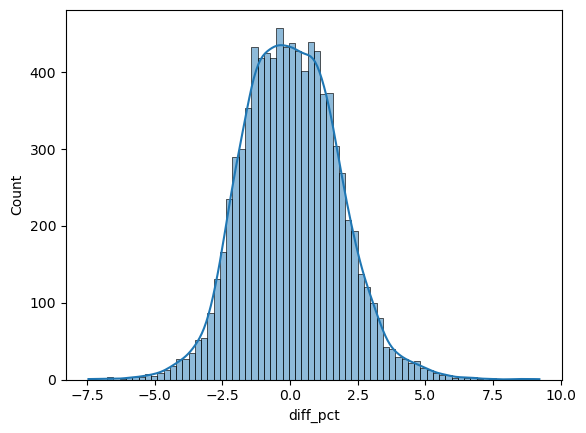

In [79]:
sns.histplot(results_df['diff_pct'], kde=True)

In [80]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]

In [81]:
extreme_results_df.shape , results_df.shape

((0, 4), (8947, 4))

In [89]:
extreme_errors_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_errors_pct

0.0

In [ ]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct', ascending=False)

,actual,predicted,diff,diff_pct


<Axes: >

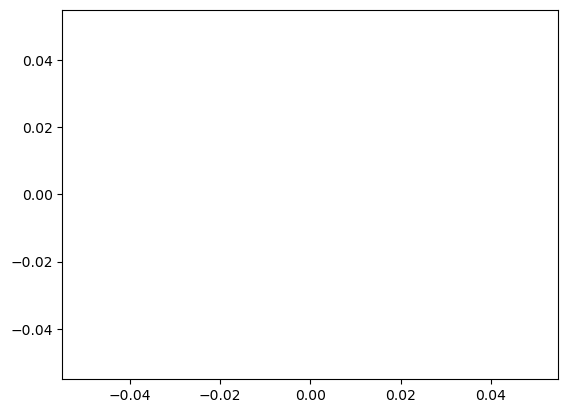

In [84]:
extreme_errors_df = X_test.loc[extreme_results_df.index]

sns.histplot(extreme_errors_df.income_lakhs, kde=True)


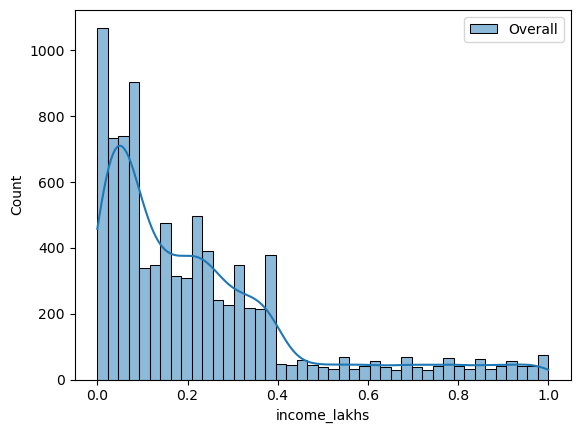

In [85]:
sns.histplot(X_test.income_lakhs, label='Overall', kde=True)
sns.histplot(extreme_errors_df.income_lakhs, label='Extreme Errors', kde=True)
plt.legend()
plt.show()

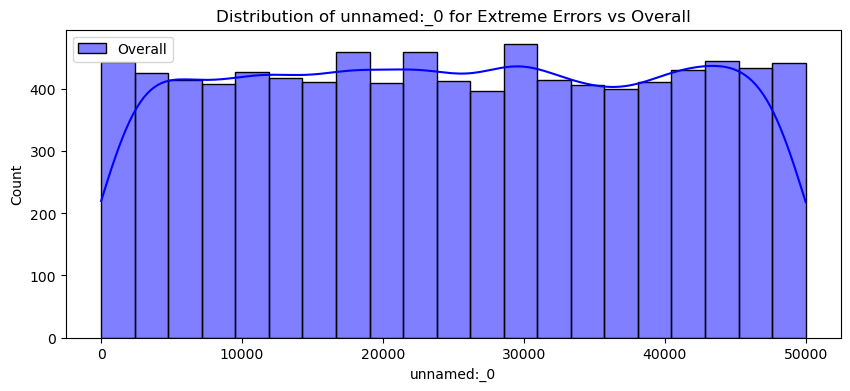

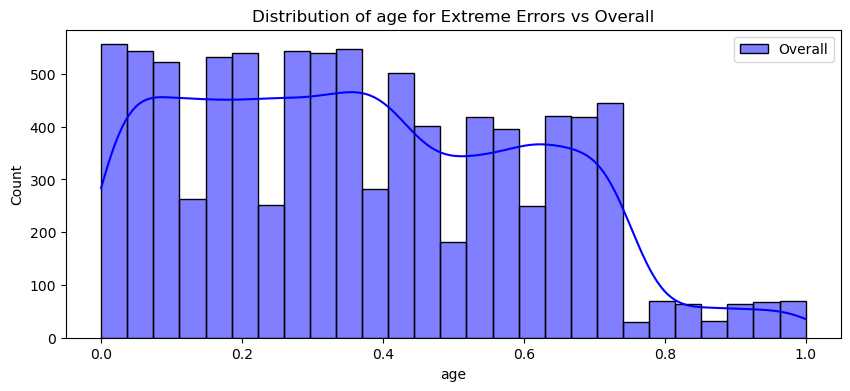

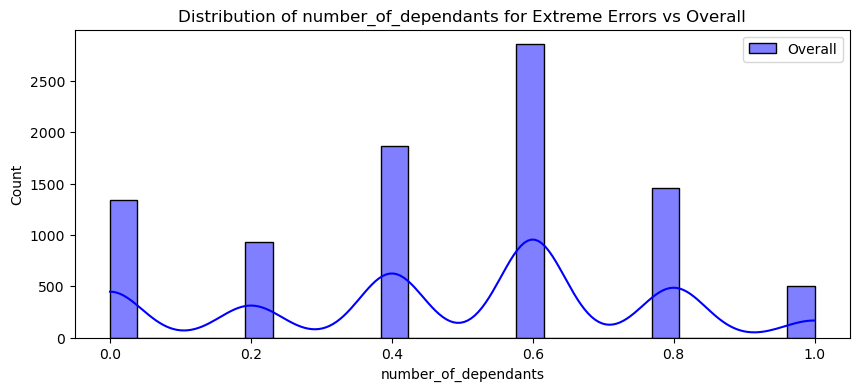

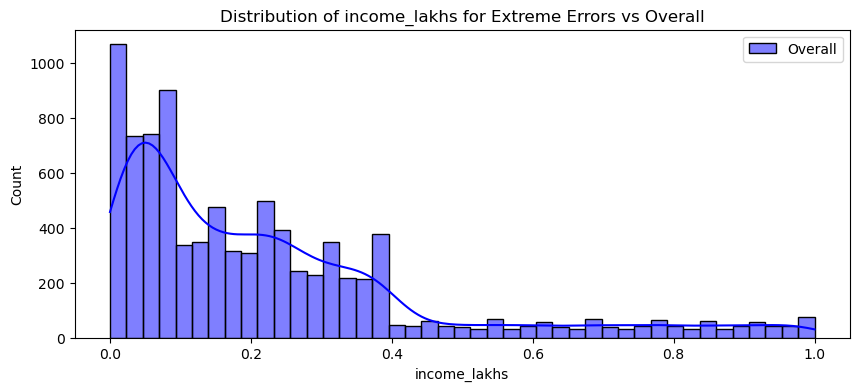

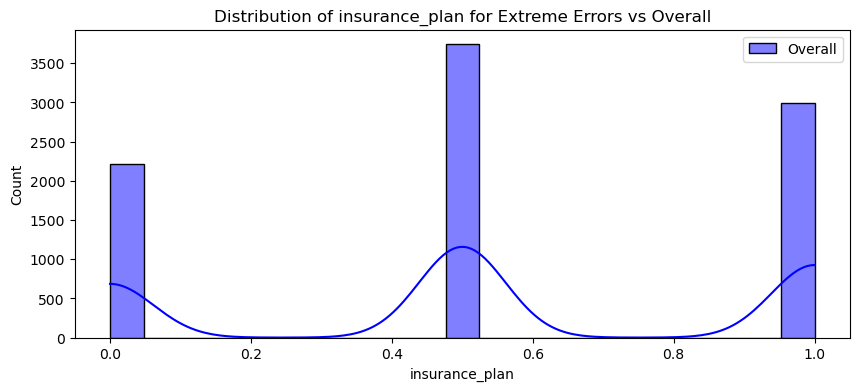

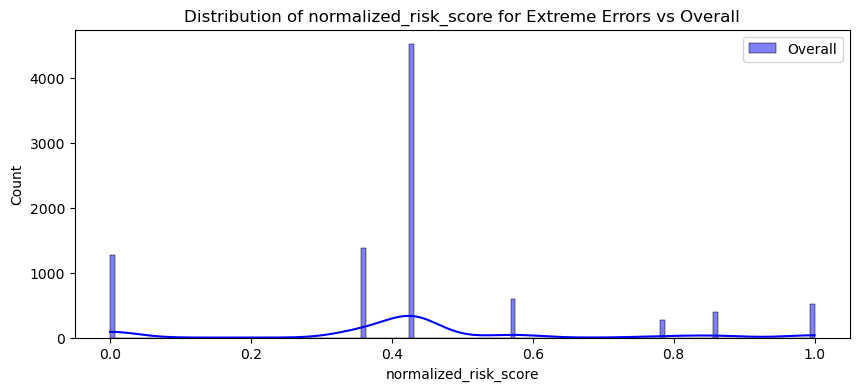

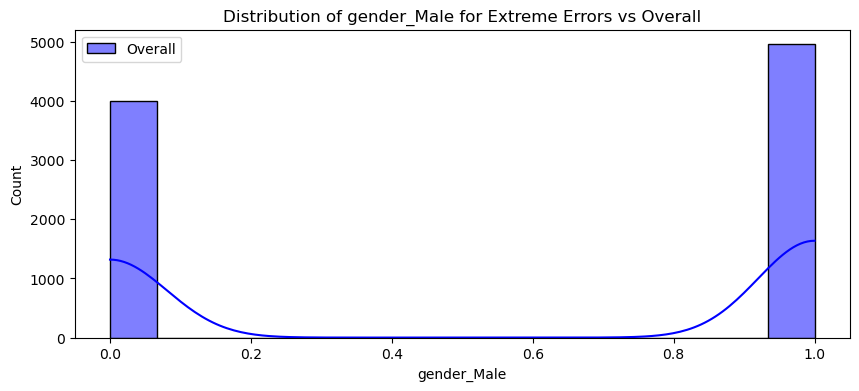

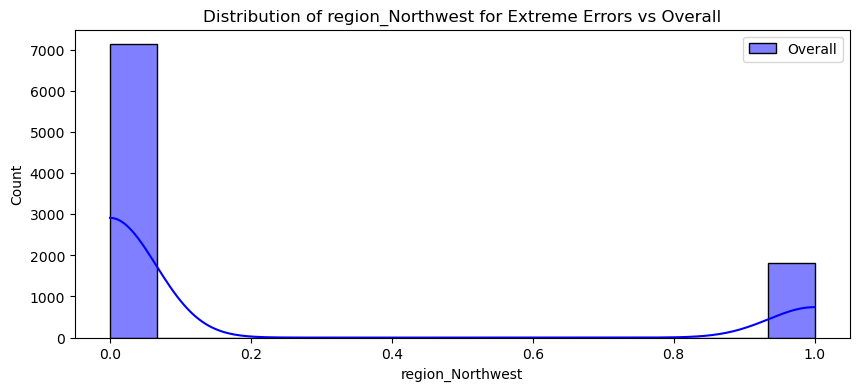

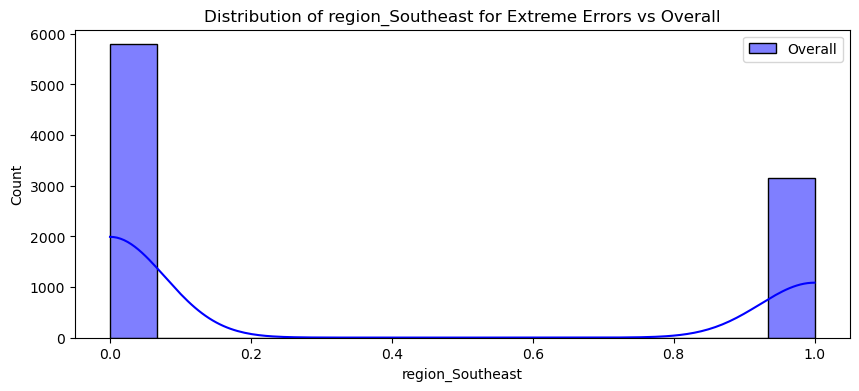

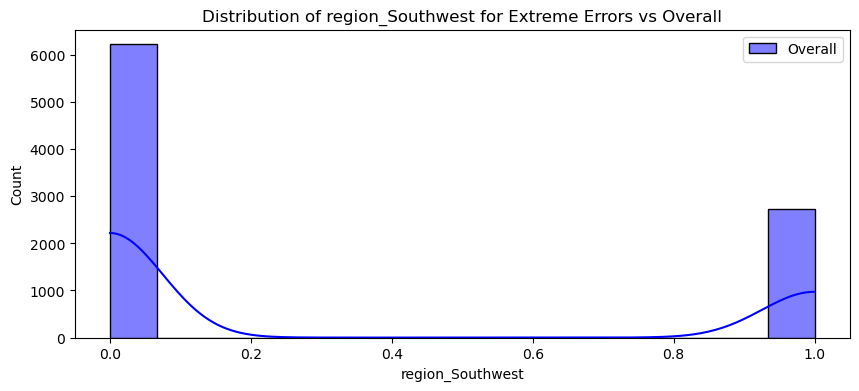

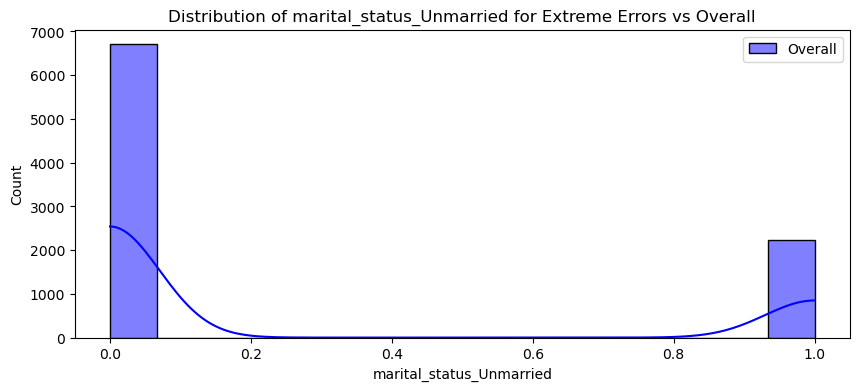

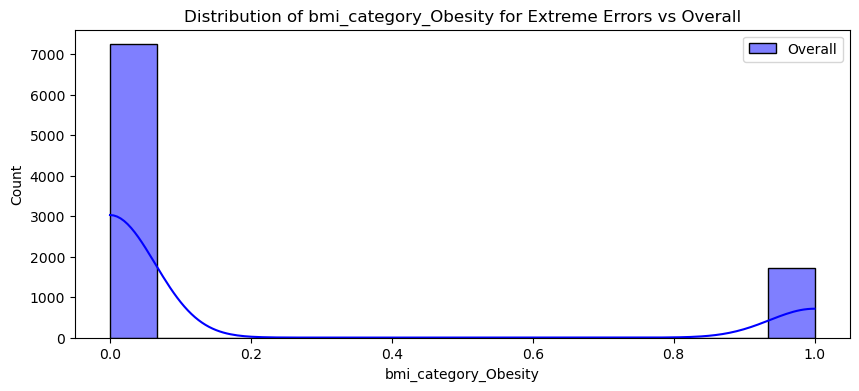

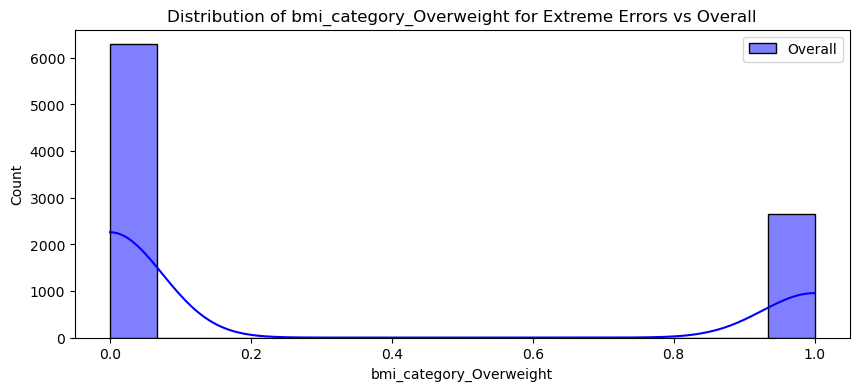

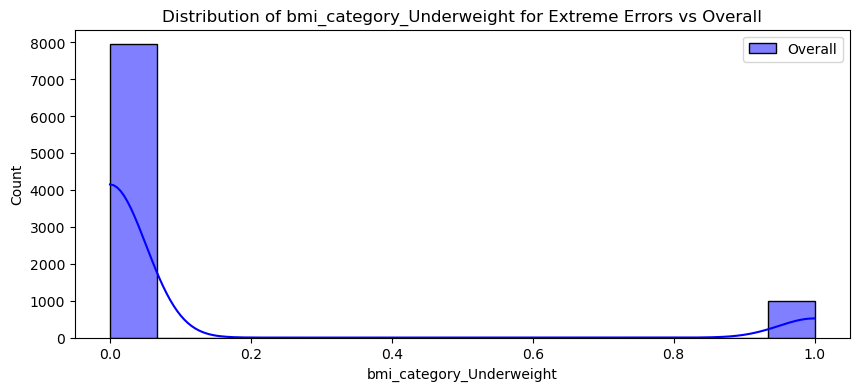

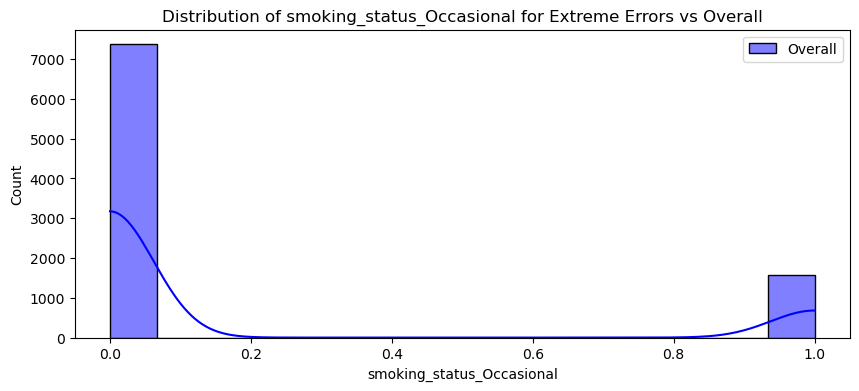

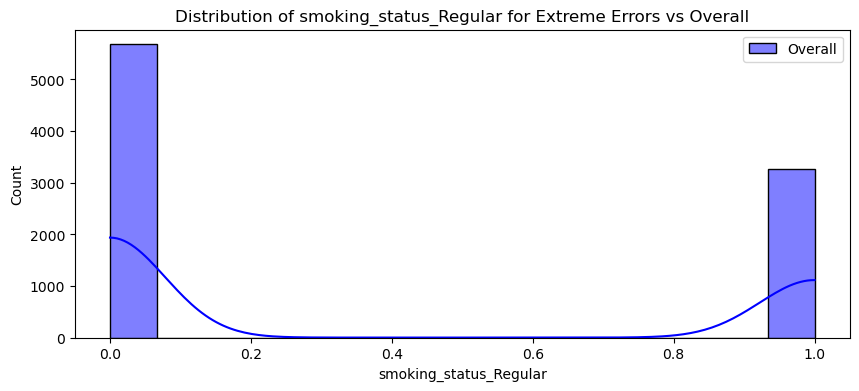

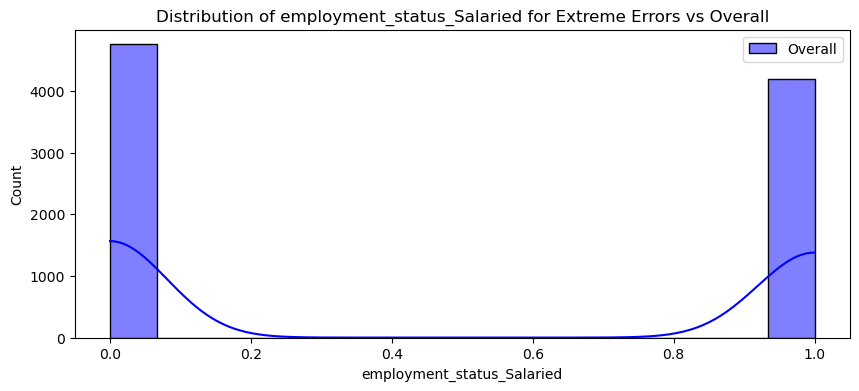

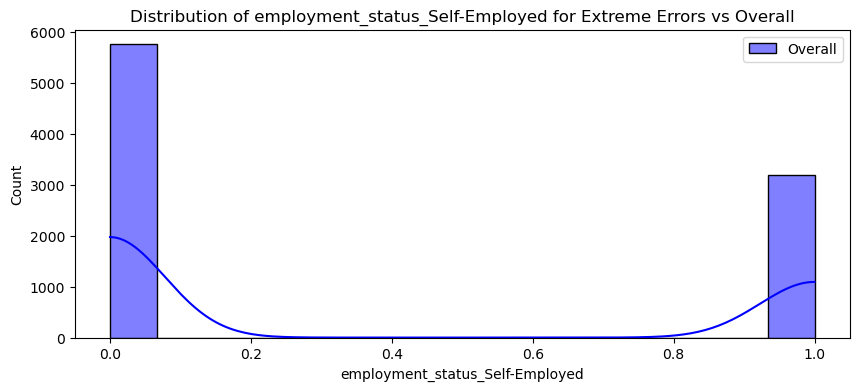

In [86]:
for feature in X_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(X_test[feature], color='blue',label='Overall', alpha=0.5, kde=True)
    sns.histplot(extreme_errors_df[feature],color='red',label='Extreme Errors', kde=True)
    plt.legend()
    plt.title(f"Distribution of {feature} for Extreme Errors vs Overall")
    plt.show()

### Let's investigate age column in detail. because extreme errors are more in lower age group area

In [87]:
extreme_errors_df['income_level'] = -1

In [88]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.

<Axes: xlabel='age', ylabel='Count'>

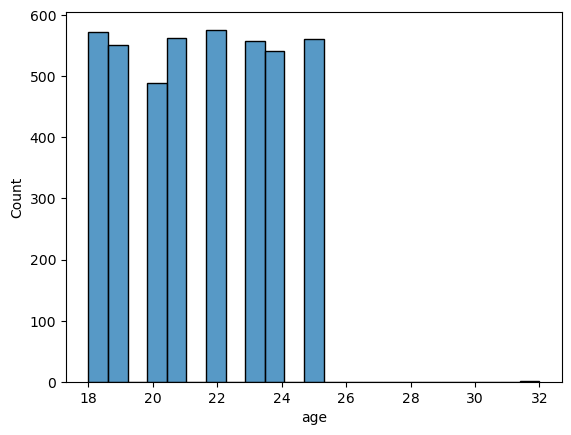

In [ ]:
sns.histplot(df_reversed.age)

In [ ]:
df_reversed.age.quantile(0.97)

25.0

### 97% data of extreme_errors group , has age group below 25. clearly this age group has some problems. so we will build two models , one for age group below 25 , another for age group above 25.